In [7]:
import torch

$$
\bar{f}_* = \mathbf{k}_*^{\top} \left( \mathbf{K} + \sigma_n^2 \mathbf{I} \right)^{-1} \mathbf{y},
$$

$$
\mathrm{V}[f_*] = k(x_*, x_*) - \mathbf{k}_*^{\top} \left( \mathbf{K} + \sigma_n^2 \mathbf{I} \right)^{-1} \mathbf{k}_*.
$$


In [13]:
# sine wave x y data

x = torch.tensor([i/500 for i in range(500)], dtype=torch.float64).unsqueeze(1)

test_fn = lambda x: torch.sin(x*20)*x + 5.
y = test_fn(x)

print(x.shape, y.shape)

torch.Size([500, 1]) torch.Size([500, 1])


In [14]:
# Squared Exponential Kernel
def kernel(x, x_prime):
    return torch.exp(-torch.pow(x.T-x_prime, 2)/0.1) + torch.zeros(x.shape[0])

In [15]:
kernel(x, x)

tensor([[1.0000e+00, 9.9996e-01, 9.9984e-01,  ..., 5.1170e-05, 4.9173e-05,
         4.7251e-05],
        [9.9996e-01, 1.0000e+00, 9.9996e-01,  ..., 5.3243e-05, 5.1170e-05,
         4.9173e-05],
        [9.9984e-01, 9.9996e-01, 1.0000e+00,  ..., 5.5396e-05, 5.3243e-05,
         5.1170e-05],
        ...,
        [5.1170e-05, 5.3243e-05, 5.5396e-05,  ..., 1.0000e+00, 9.9996e-01,
         9.9984e-01],
        [4.9173e-05, 5.1170e-05, 5.3243e-05,  ..., 9.9996e-01, 1.0000e+00,
         9.9996e-01],
        [4.7251e-05, 4.9173e-05, 5.1170e-05,  ..., 9.9984e-01, 9.9996e-01,
         1.0000e+00]], dtype=torch.float64)

In [16]:
# x_star = torch.tensor([1], dtype=torch.float32)

# x_star = torch.tensor([i for i in range(5)], dtype=torch.float32).unsqueeze(1)

sigma_n = 1e-6

def predict_mu(x_star):
    
    K = kernel(x, x) + sigma_n*torch.eye(x.shape[0])
    L = torch.linalg.cholesky(K)
    alpha = torch.cholesky_solve(y, L)
    f_star = kernel(x_star, x).T @ alpha

    return f_star

X_start = torch.tensor([i/100 for i in range(100)], dtype=torch.float64).unsqueeze(1)
Mu_start = torch.tensor([predict_mu(xx) for xx in X_start])

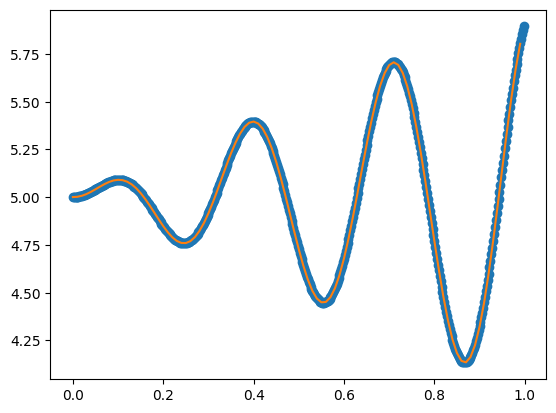

In [17]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.plot(X_start, Mu_start)